## Text Classification- Consumer Complaints

### Abstract

Text data is a common form of unstructured data and getting meaningful insights from text data can be difficult. Supervised machine learning algorithms can be used to classify text documents using Natural Language Processing techniques. Text classification involves trying to organize text documents into various categories based on inherent properties or attributes of the text document. Here we are trying to determine which product class the text documents belong.We will have trained text classification model at the end of the project.

### Problem Statement

A large amount of data is generated via the SDK Bank's consumer complaints tool. Each complaint has a narrative which can be used to categorize it’s relation to bank's product. Currently complaints are classified by support specialists. Classifying the complaints will  allow redirecting the complaints to the correct department as soon as complaints are logged. The classified complaints will be verified by the departments before processing. A text classifier can provide immediate cost savings, better SLA and more accurate predictions than a human counterpart. Improved customer satisfaction and improved efficiency of common workflows are major outcomes


### Objective

The objective of this project is to classify the consumer complaints by product category using Supervised Machine Learning techniques. Mortgage and Debt Collection are the two products classes selected for Text classification.


In [1]:
!python --version

Python 3.6.13 :: Anaconda, Inc.


In [2]:
#all libraries
import pandas as pd
import re #text preprocessing and wrangling
import os
import spacy
import matplotlib.pyplot as plt
pd.options.display.max_colwidth =1000
#os.getcwd()

### Read Data

In [3]:
raw=pd.read_csv("complaints-2021.csv",parse_dates=['Date received','Date sent to company'])

In [4]:
#rename columns
names=['recieved_date','product','subproduct','issue','subissue','consumer_complaint_narrative','company_response_public','company','state','zipcode','tags','consumer_consent_provided','submit_mode','senttocompany_date','company_response_consumer','timely_response','consumer_disputed','id']
raw.columns=names

In [5]:
# adding new features

#narrative length
raw['narrative_len'] = raw['consumer_complaint_narrative'].astype(str).apply(len)

#narrative word count
raw['narrative_word_count'] = raw['consumer_complaint_narrative'].apply(lambda x: len(str(x).split()))

### Dataset Description

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5233 entries, 0 to 5232
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   recieved_date                 5233 non-null   datetime64[ns]
 1   product                       5233 non-null   object        
 2   subproduct                    5233 non-null   object        
 3   issue                         5233 non-null   object        
 4   subissue                      5233 non-null   object        
 5   consumer_complaint_narrative  5233 non-null   object        
 6   company_response_public       5233 non-null   object        
 7   company                       5233 non-null   object        
 8   state                         5233 non-null   object        
 9   zipcode                       5233 non-null   object        
 10  tags                          5233 non-null   object        
 11  consumer_consent_provided     

### Exploratory Analysis

In [7]:
raw.groupby(["company", "product"])["id"].count().sort_values(ascending=False)

company                                   product        
Shellpoint Partners, LLC                  Mortgage           164
WELLS FARGO & COMPANY                     Mortgage           128
LoanCare, LLC                             Mortgage           122
I.C. System, Inc.                         Debt collection    120
AMERISAVE MORTGAGE CORPORATION            Mortgage           113
                                                            ... 
Fairway Independent Mortgage Corporation  Debt collection      1
                                          Mortgage             1
Peroutka, Miller, Klima & Peters, P.A.    Debt collection      1
Fein, Such, Kahn & Shepard, P.C.          Debt collection      1
KMD Partners, LLC                         Debt collection      1
Name: id, Length: 851, dtype: int64

In [8]:
#conda install -c anaconda plotly

In [9]:
#conda install -c conda-forge cufflinks-py

In [10]:
import plotly.io as iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
raw['narrative_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='narrative length',
    linecolor='black',
    yTitle='count',
    title='Narrative Text Length Distribution')

In [11]:
#drop rows narrative length greater 5K

raw=raw[raw['narrative_len']<5000]
raw.reset_index(drop=True)

,recieved_date,product,subproduct,issue,subissue,consumer_complaint_narrative,company_response_public,company,state,zipcode,tags,consumer_consent_provided,submit_mode,senttocompany_date,company_response_consumer,timely_response,consumer_disputed,id,narrative_len,narrative_word_count
0,2021-01-30,Debt collection,Federal student loan debt,Threatened to contact someone or share information improperly,Contacted your employer,"I received a letter dated XX/XX/XXXX, stating that my Federal loan debt ( approximately XXXX ) was taken over by another company after the initial company, Conserv/Ascendium in conjunction with XXXX XXXX XXXX XXXX, conducted a financial review/administrative hearing to determine if and what I could pay on the past loans. I never received any resolution from Conserv/ECMC but the next time I heard anything about my loans was when I was contacted with a letter from the new company, NES, or National Enterprise System. Again, I did not receive a determination letter or a conclusion to this initial review but rather, was contacted by a new collector named, National Enterprise System ( NES ). I contacted ( via phone call XXXX ext.XXXX ) NES and was routed to a XXXX XXXX XXXX manager ext.XXXX ). According to the letter his department sent me and Mr. XXXX admissions on the first phone call, I had three options one of which was the ability to rehabilitate my loans with XXXX ( a federal loan ...",Company has responded to the consumer and the CFPB and chooses not to provide a public response,"National Enterprise Systems, Inc.",SC,294XX,None,Consent provided,Web,2021-01-30,Closed with explanation,Yes,NaN,4106105,3609,633
1,2021-01-20,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,"Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I don't have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this isn't my debt, this is harassment.",None,Bonneville Billing and Collections,WA,986XX,Servicemember,Consent provided,Web,2021-01-20,Closed with explanation,Yes,NaN,4081174,344,64
2,2021-01-15,Debt collection,Medical debt,Written notification about debt,Didn't receive enough information to verify debt,"I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.",None,Medical Business Bureau,IL,606XX,None,Consent provided,Web,2021-01-15,Closed with explanation,Yes,NaN,4071675,323,53
3,2021-01-30,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,"Starting around XX/XX/XXXX, I receive a call every day around XXXX XXXX ( except maybe Sunday XXXX from phone number XXXX. I have not answered. Today, XX/XX/XXXX, I inadvertently called the number. I was trying to get the complete phone number so I could file this complaint. \n\nI heard a recorded voice that gave an amount owed, a notice of a convenience fee for collecting payment, and a website : sequium.com. There is no collection account information on my credit report, I've received nothing in the mail, and any collection debt in the past is paid and is at least twenty years old.",Company believes it acted appropriately as authorized by contract or law,"Sequium Asset Solutions, LLC",PA,15009,None,Consent provided,Web,2021-01-30,Closed with explanation,Yes,NaN,4105089,588,103
4,2021-01-19,Mortgage,Conventional home mortgage,Trouble during payment process,None,"Background : New Res Shellpoint Mtg took over the mortgage servicing of our loan from XXXX XXXX XXXX when we file for Chapter XXXX Bankruptcy protection on XX/XX/XXXX. We were behind on payments and included them in our

In [12]:
raw['narrative_word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Narrative Text Word Count Distribution')


In [13]:
#drop rows narrative length greater 5K

raw=raw[raw['narrative_word_count']<500]
raw.reset_index(drop=True)

,recieved_date,product,subproduct,issue,subissue,consumer_complaint_narrative,company_response_public,company,state,zipcode,tags,consumer_consent_provided,submit_mode,senttocompany_date,company_response_consumer,timely_response,consumer_disputed,id,narrative_len,narrative_word_count
0,2021-01-20,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,"Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I don't have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this isn't my debt, this is harassment.",None,Bonneville Billing and Collections,WA,986XX,Servicemember,Consent provided,Web,2021-01-20,Closed with explanation,Yes,NaN,4081174,344,64
1,2021-01-15,Debt collection,Medical debt,Written notification about debt,Didn't receive enough information to verify debt,"I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.",None,Medical Business Bureau,IL,606XX,None,Consent provided,Web,2021-01-15,Closed with explanation,Yes,NaN,4071675,323,53
2,2021-01-30,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,"Starting around XX/XX/XXXX, I receive a call every day around XXXX XXXX ( except maybe Sunday XXXX from phone number XXXX. I have not answered. Today, XX/XX/XXXX, I inadvertently called the number. I was trying to get the complete phone number so I could file this complaint. \n\nI heard a recorded voice that gave an amount owed, a notice of a convenience fee for collecting payment, and a website : sequium.com. There is no collection account information on my credit report, I've received nothing in the mail, and any collection debt in the past is paid and is at least twenty years old.",Company believes it acted appropriately as authorized by contract or law,"Sequium Asset Solutions, LLC",PA,15009,None,Consent provided,Web,2021-01-30,Closed with explanation,Yes,NaN,4105089,588,103
3,2021-01-19,Mortgage,Conventional home mortgage,Trouble during payment process,None,"Background : New Res Shellpoint Mtg took over the mortgage servicing of our loan from XXXX XXXX XXXX when we file for Chapter XXXX Bankruptcy protection on XX/XX/XXXX. We were behind on payments and included them in our plan. \n\nWhen the loan was transferred from XXXX XXXX XXXX to Shellpoint on XX/XX/XXXX. Either XXXX XXXX XXXX or Shellpoint didn't record our payment of {$3500.00} which was paid on XX/XX/XXXX electronically posted according to XXXX XXXX. \n\nThis threw our payment history off for years. Until Congress passed the Morgage Servicing Act in April of 2018, I was unaware there was an issue. \n\nFinally after years and having to retain an attorney, Shellpoint found the payment. After weeks on end of calling, emailing, and being placed on hold. \n\nMy Chapter XXXX Bankruptcy was discharged, XX/XX/XXXX Problem # 1, The Shellpoint Statements have been misstated since they began serving the loan. This affects our ability to provide documentation in order to refinance our l...",Company believes the complaint provided an opportunity to answer consumer's questions,"Shellpoint Partners, LLC",MD,None,Older American,Consent provided,Web,2021-01-19,Closed with explanation,Yes,NaN,4078139,2595,436
4,2021-01-11,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt is not yours,"I have recently reviewed a copy of my credit report. I ( Consumer, XXXX XXXX ) notice that there are several inaccuraries on my report that I didn't authorize =. These accounts are violating my rights according to the FDCPA. The Credit Reporting agency continues to violate 

In [14]:
#count by product type
raw['product'].value_counts()

Debt collection    3193
Mortgage           1637
Name: product, dtype: int64

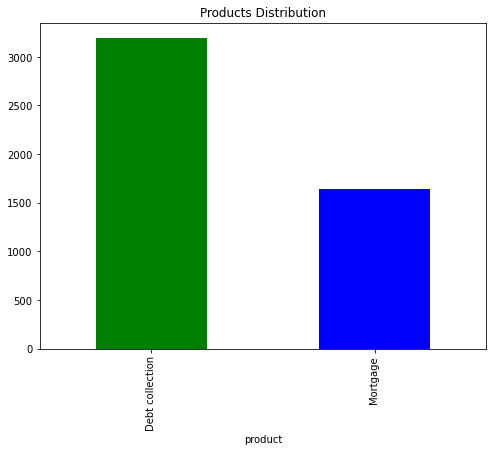

In [15]:
fig = plt.figure(figsize=(8,6))
raw.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0,color=['green','blue'])
plt.title('Products Distribution')
plt.show()

In [16]:
#count by state
raw["state"].value_counts()

CA                                      584
TX                                      542
FL                                      509
GA                                      337
NY                                      209
PA                                      200
IL                                      167
NJ                                      167
MD                                      139
AZ                                      128
MA                                      123
NC                                      119
VA                                      117
MI                                      115
OH                                      104
TN                                       93
MO                                       90
AL                                       90
WA                                       81
NV                                       79
SC                                       76
CO                                       71
WI                              

In [17]:
#conda install -c anaconda seaborn

Text(0.5, 1.0, 'Top 10 states by complaints')

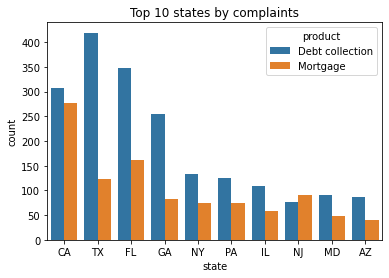

In [18]:
#State wise distribution

import seaborn as sns
sns.countplot(data=raw,x='state',hue='product',order=raw.state.value_counts().iloc[:10].index).set_title("Top 10 states by complaints")



Text(0.5, 1.0, 'Complaints by Date')

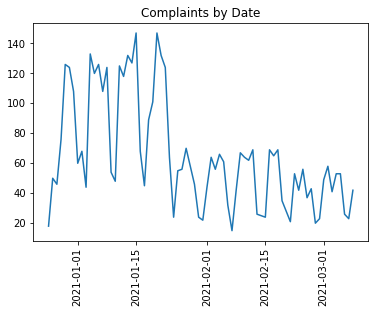

In [19]:
cnt =raw.groupby('recieved_date').size().rename('Count')
result = raw.drop_duplicates(subset='recieved_date')\
    .merge(cnt, left_on='recieved_date', right_index=True)
result = result.sort_values('recieved_date', ascending=True)
plt.plot(result['recieved_date'], result['Count'])
plt.xticks(rotation='vertical')
plt.title('Complaints by Date')

### Text Preprocessing

In [20]:
#dataframe for text classification

complaints=raw.loc[:,['product','consumer_complaint_narrative']]
complaints.head()

,product,consumer_complaint_narrative
1,Debt collection,"Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I don't have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this isn't my debt, this is harassment."
2,Debt collection,"I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info."
3,Debt collection,"Starting around XX/XX/XXXX, I receive a call every day around XXXX XXXX ( except maybe Sunday XXXX from phone number XXXX. I have not answered. Today, XX/XX/XXXX, I inadvertently called the number. I was trying to get the complete phone number so I could file this complaint. \n\nI heard a recorded voice that gave an amount owed, a notice of a convenience fee for collecting payment, and a website : sequium.com. There is no collection account information on my credit report, I've received nothing in the mail, and any collection debt in the past is paid and is at least twenty years old."
4,Mortgage,"Background : New Res Shellpoint Mtg took over the mortgage servicing of our loan from XXXX XXXX XXXX when we file for Chapter XXXX Bankruptcy protection on XX/XX/XXXX. We were behind on payments and included them in our plan. \n\nWhen the loan was transferred from XXXX XXXX XXXX to Shellpoint on XX/XX/XXXX. Either XXXX XXXX XXXX or Shellpoint didn't record our payment of {$3500.00} which was paid on XX/XX/XXXX electronically posted according to XXXX XXXX. \n\nThis threw our payment history off for years. Until Congress passed the Morgage Servicing Act in April of 2018, I was unaware there was an issue. \n\nFinally after years and having to retain an attorney, Shellpoint found the payment. After weeks on end of calling, emailing, and being placed on hold. \n\nMy Chapter XXXX Bankruptcy was discharged, XX/XX/XXXX Problem # 1, The Shellpoint Statements have been misstated since they began serving the loan. This affects our ability to provide documentation in order to refinance our l..."
5,Debt collection,"I have recently reviewed a copy of my credit report. I ( Consumer, XXXX XXXX ) notice that there are several inaccuraries on my report that I didn't authorize =. These accounts are violating my rights according to the FDCPA. The Credit Reporting agency continues to violate my rights according to 15 USC 1692d "" Any bad debt furnished on your reports is ruining your reputation and its defamation of character. '' I have attached my FTC report, License, and SSC."


In [21]:
complaints.isnull().sum()

product                         0
consumer_complaint_narrative    0
dtype: int64

In [22]:
##Expanding Contractions

from contractions import CONTRACTION_MAP

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [23]:
#add new column to dataframe for clean narrative
#complaints['narrative_clean']=''

In [24]:
#iterate through all the rows
for i, row in complaints.iterrows():
    complaints.at[i, 'narrative_expanded'] = expand_contractions(row.consumer_complaint_narrative)

In [25]:
#Remove Accented characters
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [26]:
for i, row in complaints.iterrows():
    complaints.at[i, 'narrative_accented'] = remove_accented_chars(row.narrative_expanded)

In [27]:
complaints.head()

,product,consumer_complaint_narrative,narrative_expanded,narrative_accented
1,Debt collection,"Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I don't have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this isn't my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment."
2,Debt collection,"I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info."
3,Debt collection,"Starting around XX/XX/XXXX, I receive a call every day around XXXX XXXX ( except maybe Sunday XXXX from phone number XXXX. I have not answered. Today, XX/XX/XXXX, I inadvertently called the number. I was trying to get the complete phone number so I could file this complaint. \n\nI heard a recorded voice that gave an amount owed, a notice of a convenience fee for collecting payment, and a website : sequium.com. There is no collection account information on my credit report, I've received nothing in the mail, and any collection debt in the past is paid and is at least twenty years old.","Starting around XX/XX/XXXX, I receive a call every day around XXXX XXXX ( except maybe Sunday XXXX from phone number XXXX. I have not answered. Today, XX/XX/XXXX, I inadvertently called the number. I was trying to get the complete phone number so I could file this complaint. \n\nI heard a recorded voice that gave an amount owed, a notice of a convenience fee for collecting payment, and a website : sequium.com. There is no collection account information on my credit report, I have received nothing in the mail, and any collection debt in the past is paid and is at least twenty years old.","Starting around XX/XX/XXXX, I receive a call every day around XXXX XXXX ( except maybe Sunday XXXX from phone number XXXX. I have not answered. Today, XX/XX/XXXX, I inadvertently called the number. I was trying to get the complete phone number so I could file this complaint. \n\nI heard a recorded voice that gave an amount owed, a notice of a convenience fee for collecting payment, and a website : sequium.com. There is no collection account information on my credit report, I have received nothing in the mail, and any collection debt in the past is paid and is at least twenty years old."
4,Mortgage,"Background : New Res Shellpoint Mtg took over the mo

In [28]:
# Entity Removal
nlp = spacy.load('en_core_web_sm')
def remove_entity(text_data):
    document = nlp(text_data)
    text_no_namedentities = []
    #print(type(text_no_namedentities))
    ents = [e.text for e in document.ents]
    for item in document:
        if item.text in ents:
            pass
        else:
            text_no_namedentities.append(item.text)
            #return " ".join(text_no_namedentities)
    return " ".join(text_no_namedentities)
        

In [29]:
for i, row in complaints.iterrows():
    complaints.at[i, 'narrative_entity'] = remove_entity(row.narrative_accented)

In [30]:
complaints.head()

,product,consumer_complaint_narrative,narrative_expanded,narrative_accented,narrative_entity
1,Debt collection,"Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I don't have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this isn't my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","debt collection has called twice ( about a week ago and XX / XX/2021 ) leaving a message but no detail other than a callback number . I do not have any unpaid debts and when trying to call the number they provide , you just sit on hold in a queue for over an hour . No answers . Considering this is not my debt , this is harassment ."
2,Debt collection,"I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau . Unfortunately , the bureau failed to provide any documentation with my signature verifying this debt . I can not pay and will not pay anything that can not be verified . I requested detailed documentaion and the Bureau could not proivde this info ."
3,Debt collection,"Starting around XX/XX/XXXX, I receive a call every day around XXXX XXXX ( except maybe Sunday XXXX from phone number XXXX. I have not answered. Today, XX/XX/XXXX, I inadvertently called the number. I was trying to get the complete phone number so I could file this complaint. \n\nI heard a recorded voice that gave an amount owed, a notice of a convenience fee for collecting payment, and a website : sequium.com. There is no collection account information on my credit report, I've received nothing in the mail, and any collection debt in the past is paid and is at least twenty years old.","Starting around XX/XX/XXXX, I receive a call every day around XXXX XXXX ( except maybe Sunday XXXX from phone number XXXX. I have not answered. Today, XX/XX/XXXX, I inadvertently called the number. I was trying to get the complete phone number so I could file this complaint. \n\nI heard a recorded voice that gave an amount owed, a notice of a convenience fee for collecting payment, and a website : sequium.com. There is no collection account information on my credit report, I have received nothing in the mail, and any collection debt in the past is paid and is at 

In [31]:
#to lowercase
complaints['narrative_clean'] =complaints['narrative_entity'].apply(lambda x: ' '.join([i.lower() for i in x.split()]))

In [32]:
#clean function using regex

def clean(s):
    #s = s.replace(r'<lb>', "\n")
    #s = s.replace(r'<tab>', "\i")
    #s = re.sub(r'<br */*>', "\n", s)
    #s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    #s = s.replace("&amp;", "&")
    # markdown urls
    #s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    #s = re.sub(r'https*://[^\s]*', "", s)
    #s = re.sub(r'_+', ' ', s)
    #s = re.sub(r'"+', '"', s)
    #s = re.sub(r"\With",'', s )
    s= re.sub(r"[-}):,@\?\$%_({+"".=#!|&;*>'<`~]", "", s)
    s=re.sub(r'[xx/xx/xxxx]*', '', s)
    s=re.sub(r"\n",'', s)
    s = re.sub(r"\d", "", s)
    #s=re.sub(r"\b[a-zA-Z]\b", "", s)
    s= re.sub(r"\s+"," ", s)
    s=re.sub(r"^\s+", "", s)
    s=s.replace('""', "")
    s=s.replace("'", "")
    s=s.replace('"', '')
    s=re.sub(r"\s+[a-zA-Z]\s+", " ", s)
    s = re.sub(r"\With",'', s )
    #s=s.replace(r'[^\w\s]',"")
    #s=re.sub("\s\s+" , " ", s)
    return str(s)

In [33]:
#iterate through all the rows
for i, row in complaints.iterrows():
    complaints.at[i, 'narrative_clean'] = clean(row.narrative_clean)

In [34]:
#check few rows
complaints.head(3)

,product,consumer_complaint_narrative,narrative_expanded,narrative_accented,narrative_entity,narrative_clean
1,Debt collection,"Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I don't have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this isn't my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","debt collection has called twice ( about a week ago and XX / XX/2021 ) leaving a message but no detail other than a callback number . I do not have any unpaid debts and when trying to call the number they provide , you just sit on hold in a queue for over an hour . No answers . Considering this is not my debt , this is harassment .",debt collection has called twice about week ago and leaving message but no detail other than callback number do not have any unpaid debts and when trying to call the number they provide you just sit on hold in queue for over an hour no answers considering this is not my debt this is harassment
2,Debt collection,"I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau . Unfortunately , the bureau failed to provide any documentation with my signature verifying this debt . I can not pay and will not pay anything that can not be verified . I requested detailed documentaion and the Bureau could not proivde this info .",i sent certified verification of debt letter to the medical business bureau unfortunately the bureau failed to provide any documentation with my signature verifying this debt can not pay and will not pay anything that can not be verified requested detailed documentaion and the bureau could not proivde this info
3,Debt collection,"Starting around XX/XX/XXXX, I receive a call every day around XXXX XXXX ( except maybe Sunday XXXX from phone number XXXX. I have not answered. Today, XX/XX/XXXX, I inadvertently called the number. I was trying to get the complete phone number so I could file this complaint. \n\nI heard a recorded voice that gave an amount owed, a notice of a convenience fee for collecting payment, and a website : sequium.com. There is no collection account information on my credit report, I've received nothing in the mail, and any collection debt i

In [35]:
#load spacy
nlp = spacy.load('en_core_web_sm')

#check pos and tags for sample text
test_sentence=complaints.iloc[0,5]
test_word=test_sentence.split()
spacy_pos_tagged = [(test_word, test_word.tag_, test_word.pos_) for test_word in nlp(test_sentence)]
pd.DataFrame(spacy_pos_tagged).T

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,debt,collection,has,called,twice,about,week,ago,and,leaving,...,answers,considering,this,is,not,my,debt,this,is,harassment
1,NN,NN,VBZ,VBN,RB,IN,NN,RB,CC,VBG,...,NNS,VBG,DT,VBZ,RB,PRP$,NN,DT,VBZ,NN
2,NOUN,NOUN,VERB,VERB,ADV,ADP,NOUN,ADV,CCONJ,VERB,...,NOUN,VERB,DET,VERB,ADV,ADJ,NOUN,DET,VERB,NOUN


### Natural Language Processing

In [36]:
#tags and pos
for i, row in complaints.iterrows():
    if i % 1000 == 0:
        print(i)
    if(row["narrative_clean"] and len(str(row["narrative_clean"])) < 1000000):
        doc = nlp(str(row["narrative_clean"]))
        adjectives = []
        nouns = []
        verbs = []
        lemmas = []

        for token in doc:
            lemmas.append(token.lemma_)
            if token.pos_ == "ADJ":
                adjectives.append(token.lemma_)
            if token.pos_ == "NOUN" or token.pos_ == "PROPN":
                nouns.append(token.lemma_)
            if token.pos_ == "VERB":
                verbs.append(token.lemma_)
                
        complaints.at[i, "narrative_lemma"] = " ".join(lemmas)                
        complaints.at[i, "narrative_nouns"] = " ".join(nouns)
        complaints.at[i, "narrative_adjectives"] = " ".join(adjectives)
        complaints.at[i, "narrative_verbs"] = " ".join(verbs)
        complaints.at[i, "narrative_nav"] = " ".join(nouns+adjectives+verbs)
        complaints.at[i, "no_tokens"] = len(lemmas)

1000
2000
3000
4000
5000


In [37]:
#check few rows
complaints.head(10)

,product,consumer_complaint_narrative,narrative_expanded,narrative_accented,narrative_entity,narrative_clean,narrative_lemma,narrative_nouns,narrative_adjectives,narrative_verbs,narrative_nav,no_tokens
1,Debt collection,"Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I don't have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this isn't my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","debt collection has called twice ( about a week ago and XX / XX/2021 ) leaving a message but no detail other than a callback number . I do not have any unpaid debts and when trying to call the number they provide , you just sit on hold in a queue for over an hour . No answers . Considering this is not my debt , this is harassment .",debt collection has called twice about week ago and leaving message but no detail other than callback number do not have any unpaid debts and when trying to call the number they provide you just sit on hold in queue for over an hour no answers considering this is not my debt this is harassment,debt collection have call twice about week ago and leave message but no detail other than callback number do not have any unpaid debt and when try to call the number -PRON- provide -PRON- just sit on hold in queue for over an hour no answer consider this be not -PRON- debt this be harassment,debt collection week message detail callback number debt number hold queue hour answer debt harassment,other unpaid -PRON-,have call leave do have try call provide sit consider be be,debt collection week message detail callback number debt number hold queue hour answer debt harassment other unpaid -PRON- have call leave do have try call provide sit consider be be,55.0
2,Debt collection,"I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau . Unfortunately , the bureau failed to provide any documentation with my signature verifying this debt . I can not pay and will not pay anything that can not be verified . I requested detailed documentaion and the Bureau could not proivde this info .",i sent certified verification of debt letter to the medical business bureau unfortunately the bureau failed to pr

In [38]:
len(complaints)

4830

In [39]:
complaints.iloc[8]

product                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [40]:
complaints.count()

product                         4830
consumer_complaint_narrative    4830
narrative_expanded              4830
narrative_accented              4830
narrative_entity                4830
narrative_clean                 4830
narrative_lemma                 4829
narrative_nouns                 4829
narrative_adjectives            4829
narrative_verbs                 4829
narrative_nav                   4829
no_tokens                       4829
dtype: int64

In [41]:
#Tokenising function
#def my_tokenizer(text):
#  return text.split() if text != None else []

In [42]:
#tokens=complaints.narrative_clean.map(my_tokenizer).sum()

In [43]:
#from collections import Counter
#counter = Counter(tokens)
#counter.most_common(20)

### Tokenization and Stop word removal

In [44]:
#Tokenization
complaints['narrative_tokens']=complaints['narrative_clean'].apply(lambda x: nlp.tokenizer(x))

In [45]:
complaints.head()

,product,consumer_complaint_narrative,narrative_expanded,narrative_accented,narrative_entity,narrative_clean,narrative_lemma,narrative_nouns,narrative_adjectives,narrative_verbs,narrative_nav,no_tokens,narrative_tokens
1,Debt collection,"Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I don't have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this isn't my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","debt collection has called twice ( about a week ago and XX / XX/2021 ) leaving a message but no detail other than a callback number . I do not have any unpaid debts and when trying to call the number they provide , you just sit on hold in a queue for over an hour . No answers . Considering this is not my debt , this is harassment .",debt collection has called twice about week ago and leaving message but no detail other than callback number do not have any unpaid debts and when trying to call the number they provide you just sit on hold in queue for over an hour no answers considering this is not my debt this is harassment,debt collection have call twice about week ago and leave message but no detail other than callback number do not have any unpaid debt and when try to call the number -PRON- provide -PRON- just sit on hold in queue for over an hour no answer consider this be not -PRON- debt this be harassment,debt collection week message detail callback number debt number hold queue hour answer debt harassment,other unpaid -PRON-,have call leave do have try call provide sit consider be be,debt collection week message detail callback number debt number hold queue hour answer debt harassment other unpaid -PRON- have call leave do have try call provide sit consider be be,55.0,"(debt, collection, has, called, twice, about, week, ago, and, leaving, message, but, no, detail, other, than, callback, number, do, not, have, any, unpaid, debts, and, when, trying, to, call, the, number, they, provide, you, just, sit, on, hold, in, queue, for, over, an, hour, no, answers, considering, this, is, not, my, debt, this, is, harassment)"
2,Debt collection,"I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bu

In [46]:
#function to remove stop words
def remove_stops(tokens):
    return [token.text for token in tokens if not token.is_stop]

In [47]:
#add a new column with no stop words
complaints['narrative_nostopwords']=complaints['narrative_tokens'].apply(lambda x:remove_stops(x))

In [48]:
#all tokens 
tokens_clean = complaints.narrative_nostopwords.sum()

In [49]:
#most common tokens
from collections import Counter

counter_token = Counter(tokens_clean)
counter_token.most_common(20)

[('credit', 5163),
 ('debt', 4845),
 ('account', 4584),
 ('company', 3267),
 ('mortgage', 3031),
 ('loan', 3028),
 ('payment', 2989),
 ('received', 2421),
 ('information', 2229),
 ('report', 2219),
 ('collection', 2169),
 ('sent', 1864),
 ('told', 1863),
 ('called', 1754),
 ('paid', 1703),
 ('letter', 1678),
 ('pay', 1594),
 ('time', 1537),
 ('payments', 1400),
 ('bank', 1334)]

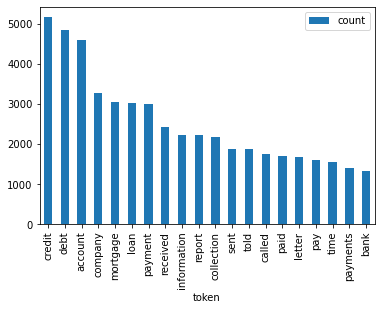

In [50]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter_token.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

In [51]:
#!pip install wordcloud

In [52]:
#wordcloud
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter_token)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.title('Tokens worldcloud after stopwords removal')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    

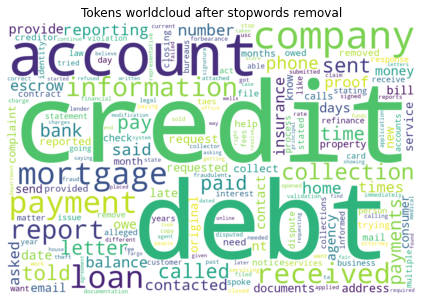

In [53]:
#wordcloud after tokenization and stopword removal
wordcloud(counter_token)

### Text Normalization

In [54]:
import nltk
from nltk.stem.porter import *

#### Stemming

In [55]:
stemmer = PorterStemmer()
#new column with stemmed text
complaints['narrative_stemmed']=complaints['narrative_nostopwords'].apply(lambda x: [stemmer.stem(y) for y in x])

In [56]:
#all stemmed tokens
tokens_stemmed = complaints.narrative_stemmed.sum()

In [57]:
#count stemmed tokens
counter_stemmed = Counter(tokens_stemmed)
counter_stemmed.most_common(20)

[('credit', 5251),
 ('account', 5133),
 ('debt', 5028),
 ('payment', 4389),
 ('report', 4361),
 ('collect', 3576),
 ('compani', 3470),
 ('loan', 3273),
 ('receiv', 3203),
 ('mortgag', 3093),
 ('call', 2824),
 ('inform', 2803),
 ('time', 2632),
 ('pay', 2017),
 ('letter', 2010),
 ('request', 1994),
 ('contact', 1971),
 ('servic', 1969),
 ('sent', 1864),
 ('told', 1863)]

In [58]:
#define wordcloud for stemmed tokens
def wordcloud1(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.title('Tokens worldcloud after stemming')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    

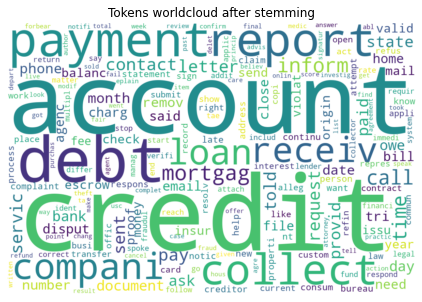

In [59]:
wordcloud1(counter_stemmed)

#### Lemmitization

In [60]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

#function to lemmitize
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anupama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [61]:
#new columns with lemmitized tokens
complaints['narrative_lemmatized']=complaints['narrative_nostopwords'].apply(lemmatize_text)

In [62]:
#standardise words
dico = {}
dico1 = open('dico1.txt', 'rb')
for word in dico1:
    word = word.decode('utf8')
    word = word.split()
    dico[word[1]] = word[3]
dico1.close()
dico2 = open('dico2.txt', 'rb')
for word in dico2:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico2.close()
dico3 = open('dico3.txt', 'rb')
for word in dico3:
    word = word.decode('utf8')
    word = word.split()
    dico[word[0]] = word[1]
dico3.close()

In [63]:
complaints.iloc[0,12]
#complaints.head()

debt collection has called twice about week ago and leaving message but no detail other than callback number do not have any unpaid debts and when trying to call the number they provide you just sit on hold in queue for over an hour no answers considering this is not my debt this is harassment 

In [64]:
def txt_std(txt):
   # print(type(txt))
   # print(len(txt))
    for i in range(len(txt)):
        if txt[i] in dico.keys():
            txt[i] = dico[txt[i]]     
    #return ' '.join(txt)
    return txt


In [65]:
type(complaints['narrative_lemmatized'])

pandas.core.series.Series

In [66]:
complaints['narrative_lemmatized'] = complaints['narrative_lemmatized'].apply(txt_std)

In [67]:
complaints.head()

,product,consumer_complaint_narrative,narrative_expanded,narrative_accented,narrative_entity,narrative_clean,narrative_lemma,narrative_nouns,narrative_adjectives,narrative_verbs,narrative_nav,no_tokens,narrative_tokens,narrative_nostopwords,narrative_stemmed,narrative_lemmatized
1,Debt collection,"Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I don't have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this isn't my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","debt collection has called twice ( about a week ago and XX / XX/2021 ) leaving a message but no detail other than a callback number . I do not have any unpaid debts and when trying to call the number they provide , you just sit on hold in a queue for over an hour . No answers . Considering this is not my debt , this is harassment .",debt collection has called twice about week ago and leaving message but no detail other than callback number do not have any unpaid debts and when trying to call the number they provide you just sit on hold in queue for over an hour no answers considering this is not my debt this is harassment,debt collection have call twice about week ago and leave message but no detail other than callback number do not have any unpaid debt and when try to call the number -PRON- provide -PRON- just sit on hold in queue for over an hour no answer consider this be not -PRON- debt this be harassment,debt collection week message detail callback number debt number hold queue hour answer debt harassment,other unpaid -PRON-,have call leave do have try call provide sit consider be be,debt collection week message detail callback number debt number hold queue hour answer debt harassment other unpaid -PRON- have call leave do have try call provide sit consider be be,55.0,"(debt, collection, has, called, twice, about, week, ago, and, leaving, message, but, no, detail, other, than, callback, number, do, not, have, any, unpaid, debts, and, when, trying, to, call, the, number, they, provide, you, just, sit, on, hold, in, queue, for, over, an, hour, no, answers, considering, this, is, not, my, debt, this, is, harassment)","[debt, collection, called, twice, week, ago, leaving, message, detail, callback, number, unpaid, debts, trying, number, provide, sit, hold, queue, hour, answers, considering, debt, harassment]","[debt, collect, call, twice, week, ago, leav, messag, detail, callback, number, unpaid, debt, tri, number, provid, sit, hold, queue, hour, answer, consid, debt, harass]","[debt, collection, called, twice, week, ago, leaving, message, detail, callback, number, unpaid, debt, trying, number, provide, sit, hold, queue, hour, answer, considering, debt, harassment]"
2,Debt collection,"I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau failed to provide any documentation with my signature verifying this debt. I can not pay and will not pay anything that can not be verified. I requested detailed documentaion and the Bureau could not proivde this info.","I sent a certified verification of debt letter to the Medical Business Bureau. Unfortunately, the bureau 

In [68]:
#all lemmatized tokens
tokens_lemmatized_debt = complaints[complaints['product']=='Debt collection'].narrative_lemmatized.sum()
counter_lemmatized_debt = Counter(tokens_lemmatized_debt)
counter_lemmatized_debt.most_common()

[('debt', 4940),
 ('credit', 4381),
 ('account', 3892),
 ('collection', 2640),
 ('report', 2400),
 ('company', 2310),
 ('information', 1718),
 ('letter', 1448),
 ('received', 1419),
 ('time', 1189),
 ('sent', 1169),
 ('payment', 1138),
 ('agency', 1010),
 ('called', 957),
 ('reporting', 923),
 ('told', 888),
 ('service', 858),
 ('number', 856),
 ('proof', 815),
 ('pay', 808),
 ('paid', 808),
 ('phone', 754),
 ('bill', 728),
 ('creditor', 723),
 ('day', 704),
 ('owe', 689),
 ('consumer', 677),
 ('provide', 669),
 ('collect', 652),
 ('original', 641),
 ('said', 634),
 ('bureau', 614),
 ('balance', 612),
 ('dispute', 586),
 ('reported', 579),
 ('contacted', 577),
 ('address', 565),
 ('charge', 550),
 ('use', 548),
 ('violation', 548),
 ('contract', 548),
 ('alleged', 540),
 ('asked', 540),
 ('year', 537),
 ('removed', 535),
 ('contact', 525),
 ('date', 513),
 ('law', 509),
 ('card', 501),
 ('owed', 496),
 ('not', 480),
 ('file', 478),
 ('request', 475),
 ('identity', 473),
 ('bank', 462),

In [69]:
tokens_lemmatized_mort = complaints[complaints['product']=='Mortgage'].narrative_lemmatized.sum()
counter_lemmatized_mort = Counter(tokens_lemmatized_mort)
counter_lemmatized_mort.most_common()

[('payment', 3251),
 ('mortgage', 2988),
 ('loan', 2830),
 ('time', 1343),
 ('account', 1239),
 ('company', 1160),
 ('received', 1038),
 ('told', 975),
 ('escrow', 928),
 ('home', 916),
 ('bank', 914),
 ('month', 910),
 ('paid', 896),
 ('pay', 803),
 ('credit', 798),
 ('called', 797),
 ('sent', 696),
 ('day', 691),
 ('insurance', 657),
 ('gmail', 593),
 ('property', 585),
 ('fee', 565),
 ('letter', 563),
 ('document', 549),
 ('check', 544),
 ('late', 544),
 ('phone', 540),
 ('closing', 535),
 ('statement', 523),
 ('said', 523),
 ('information', 514),
 ('new', 511),
 ('refinance', 508),
 ('to', 493),
 ('year', 490),
 ('taes', 483),
 ('money', 473),
 ('issue', 454),
 ('request', 449),
 ('process', 443),
 ('date', 437),
 ('service', 431),
 ('lender', 426),
 ('customer', 418),
 ('interest', 416),
 ('rate', 416),
 ('forbearance', 415),
 ('asked', 406),
 ('need', 404),
 ('contacted', 404),
 (' ', 400),
 ('servicing', 390),
 ('complaint', 388),
 ('help', 385),
 ('requested', 373),
 ('number',

In [70]:
#wordcloud for lemmatized tokens
def wordcloud2(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.title('Tokens worldcloud after lemmatization')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    

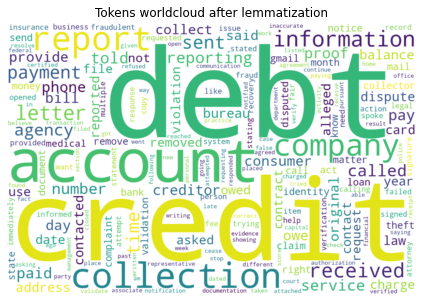

In [71]:
wordcloud2(counter_lemmatized_debt)

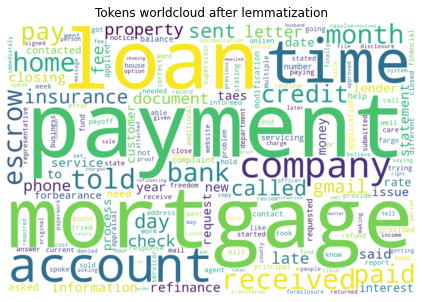

In [72]:
wordcloud2(counter_lemmatized_mort)

In [73]:
complaints.iloc[0,12]

debt collection has called twice about week ago and leaving message but no detail other than callback number do not have any unpaid debts and when trying to call the number they provide you just sit on hold in queue for over an hour no answers considering this is not my debt this is harassment 

### Entity Removal

In [74]:
#remove words less than two character
def lc_remove_2(text): 
    return ' '.join(word for word in text if len(word)  > 2)


complaints['narrative_test']=complaints['narrative_lemmatized'].apply(lambda x: lc_remove_2(x))

In [106]:
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

def remove_duplicate_string(text):
    #a="calvin klein design dress calvin klein"
    return ' '.join(unique_list(text.split()))


complaints['narrative_test']=complaints['narrative_test'].apply(lambda x: remove_duplicate_string(x))


complaints.head()



,product,consumer_complaint_narrative,narrative_expanded,narrative_accented,narrative_entity,narrative_clean,narrative_lemma,narrative_nouns,narrative_adjectives,narrative_verbs,narrative_nav,no_tokens,narrative_tokens,narrative_nostopwords,narrative_stemmed,narrative_lemmatized,narrative_test,narrative_word2vec
1,Debt collection,"Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I don't have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this isn't my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","Bonneville debt collection has called twice ( about a week ago and today XX/XX/2021 ) leaving a message but no detail other than a callback number. I do not have any unpaid debts and when trying to call the number they provide, you just sit on hold in a queue for over an hour. No one answers. Considering this is not my debt, this is harassment.","debt collection has called twice ( about a week ago and XX / XX/2021 ) leaving a message but no detail other than a callback number . I do not have any unpaid debts and when trying to call the number they provide , you just sit on hold in a queue for over an hour . No answers . Considering this is not my debt , this is harassment .",debt collection has called twice about week ago and leaving message but no detail other than callback number do not have any unpaid debts and when trying to call the number they provide you just sit on hold in queue for over an hour no answers considering this is not my debt this is harassment,debt collection have call twice about week ago and leave message but no detail other than callback number do not have any unpaid debt and when try to call the number -PRON- provide -PRON- just sit on hold in queue for over an hour no answer consider this be not -PRON- debt this be harassment,debt collection week message detail callback number debt number hold queue hour answer debt harassment,other unpaid -PRON-,have call leave do have try call provide sit consider be be,debt collection week message detail callback number debt number hold queue hour answer debt harassment other unpaid -PRON- have call leave do have try call provide sit consider be be,55.0,"(debt, collection, has, called, twice, about, week, ago, and, leaving, message, but, no, detail, other, than, callback, number, do, not, have, any, unpaid, debts, and, when, trying, to, call, the, number, they, provide, you, just, sit, on, hold, in, queue, for, over, an, hour, no, answers, considering, this, is, not, my, debt, this, is, harassment)","[debt, collection, called, twice, week, ago, leaving, message, detail, callback, number, unpaid, debts, trying, number, provide, sit, hold, queue, hour, answers, considering, debt, harassment]","[debt, collect, call, twice, week, ago, leav, messag, detail, callback, number, unpaid, debt, tri, number, provid, sit, hold, queue, hour, answer, consid, debt, harass]","[debt, collection, called, twice, week, ago, leaving, message, detail, callback, number, unpaid, debt, trying, number, provide, sit, hold, queue, hour, answer, considering, debt, harassment]",debt collection called twice week ago leaving message detail callback number unpaid trying provide sit hold queue hour answer considering harassment,"[debt, collection, called, twice, week, ago, leaving, message, detail, callback, number, unpaid, debt, trying, number, provide, sit, hold, queue, hour, answer, considering, debt, harassment]"
2,Debt collection,"I sent a certified verification of debt letter to the M

In [107]:
complaints.iloc[0,16]

'debt collection called twice week ago leaving message detail callback number unpaid trying provide sit hold queue hour answer considering harassment'

In [76]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=3,max_df=1.0)
cv_matrix = cv.fit_transform(complaints['narrative_test'])
#cv.vocabulary_
cv_matrix = cv_matrix.toarray()
cv_matrix.shape

(4830, 4143)

In [77]:
# get all unique words in the corpus
cv_vocab = cv.get_feature_names()


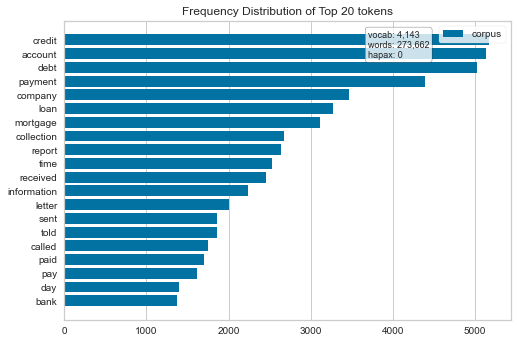

<AxesSubplot:title={'center':'Frequency Distribution of Top 20 tokens'}>

In [78]:
from yellowbrick.text import FreqDistVisualizer

#vectorizer = CountVectorizer()
#docs       = vectorizer.fit_transform(corpus.data)
#features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=cv_vocab, orient='h',n=20)
visualizer.fit(cv_matrix)
visualizer.show()


In [94]:
# show document feature vectors
pd.DataFrame(cv_matrix, columns=cv_vocab)
#z[z['aargon'] > 0]




first_vector_cv=cv_matrix[0] 
df1 = pd.DataFrame(first_vector_cv, index=cv.get_feature_names(), columns=["CountVectorizer"])
df1_sort=df1.sort_values(by=["CountVectorizer"],ascending=False)
df1_sort


,CountVectorizer
debt,3
number,2
ago,1
sit,1
trying,1
...,...
etent,0
ethic,0
ethical,0
etort,0


In [95]:
import csv

w = csv.writer(open("output.csv", "w"))
for key, val in cv.vocabulary_.items():
    w.writerow([key, val])

### TF-IDF

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf=TfidfVectorizer(min_df=5,max_df=0.85,use_idf=True) 
tfidf_matrix=tfidf.fit_transform(complaints['narrative_test'])
# get the first vector out (for the first document) 

first_vector_tfidfvectorizer=tfidf_matrix[0] 
df2 = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf.get_feature_names(), columns=["TF-IDF"])
df2_sort=df2.sort_values(by=["TF-IDF"],ascending=False)
df2_sort


,TF-IDF
queue,0.335763
callback,0.318062
sit,0.318062
considering,0.264069
debt,0.255344
...,...
etent,0.000000
ethic,0.000000
etort,0.000000
etortion,0.000000


In [99]:
merge=df1_sort.join(df2_sort)
merge.head(10)

,CountVectorizer,TF-IDF
debt,3,0.255344
number,2,0.246193
ago,1,0.173820
sit,1,0.318062
trying,1,0.141899
twice,1,0.197940
queue,1,0.335763
unpaid,1,0.222139
hour,1,0.182680
harassment,1,0.233111


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


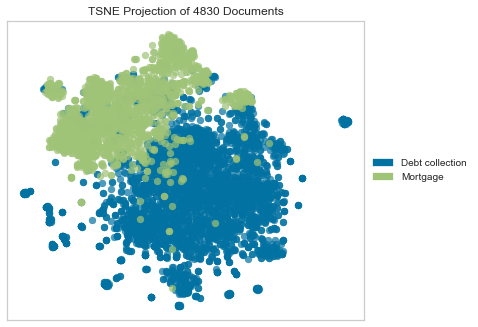

<AxesSubplot:title={'center':'TSNE Projection of 4830 Documents'}>

In [100]:
#corpus = load_hobbies()
#tfidf = TfidfVectorizer()

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies


X =tfidf.fit_transform(complaints['narrative_test'])
y = complaints['product']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

In [101]:
tfidf_matrix=tfidf_matrix.toarray()
tfidf_vocab = tfidf.get_feature_names()
pd.DataFrame(tfidf_matrix, columns=tfidf_vocab)

,abide,ability,able,absence,absent,absolute,absolutely,absurd,abuse,abused,...,wrote,year,yearly,yelled,yelling,yes,yesterday,young,zero,zone
0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.115210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.06718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.037602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4826,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4827,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4828,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Word2Vec

In [85]:
complaints['narrative_word2vec']=complaints['narrative_test'].str.split()

In [86]:
from gensim.models import Word2Vec

In [87]:
model=Word2Vec(complaints['narrative_word2vec'],min_count=1,size=10)

In [88]:
words=model.wv.vocab

In [89]:
words

{'debt': <gensim.models.keyedvectors.Vocab at 0x2130756b710>,
 'collection': <gensim.models.keyedvectors.Vocab at 0x2130756b780>,
 'called': <gensim.models.keyedvectors.Vocab at 0x2131ed5fda0>,
 'twice': <gensim.models.keyedvectors.Vocab at 0x2135abe8780>,
 'week': <gensim.models.keyedvectors.Vocab at 0x2135abe87b8>,
 'ago': <gensim.models.keyedvectors.Vocab at 0x2135abe87f0>,
 'leaving': <gensim.models.keyedvectors.Vocab at 0x2135abe8828>,
 'message': <gensim.models.keyedvectors.Vocab at 0x2135abe8860>,
 'detail': <gensim.models.keyedvectors.Vocab at 0x2135abe8898>,
 'callback': <gensim.models.keyedvectors.Vocab at 0x2135abe88d0>,
 'number': <gensim.models.keyedvectors.Vocab at 0x2135abe8908>,
 'unpaid': <gensim.models.keyedvectors.Vocab at 0x2135abe8940>,
 'trying': <gensim.models.keyedvectors.Vocab at 0x2135abe8978>,
 'provide': <gensim.models.keyedvectors.Vocab at 0x2135abe89b0>,
 'sit': <gensim.models.keyedvectors.Vocab at 0x2135abe89e8>,
 'hold': <gensim.models.keyedvectors.Vocab

In [90]:
similar=model.wv.most_similar('debt')

In [91]:
similar

[('collector', 0.9683380126953125),
 ('attempt', 0.9417829513549805),
 ('medical', 0.9348753094673157),
 ('collect', 0.9246799945831299),
 ('phishing', 0.9231630563735962),
 ('medicredit', 0.9194059371948242),
 ('valid', 0.9189639687538147),
 ('alleged', 0.9181304574012756),
 ('rmp', 0.9108372330665588),
 ('uninterrupted', 0.910246729850769)]

In [92]:
model["debt"]

C:\Users\Anupama\Anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



array([-3.6608286 , -2.8249888 , -1.4736499 , -2.6558468 , -2.542396  ,
       -1.9743066 ,  0.78480047,  2.7461402 ,  2.236073  , -0.36604667],
      dtype=float32)